In [263]:
import pandas as pd #load dataset
import numpy as np  #operations 
import seaborn as sns  #display the dataset
import matplotlib.pyplot as plt #-||-
import warnings # avoid unnecessary warnigns
%matplotlib inline
warnings.filterwarnings('ignore')
import csv

In [264]:
df = pd.read_csv("features.csv",sep=';', encoding='utf8') #eisagoume to csv arxeio mesw ths vivlio8hkhs pandas se ena dataframe(sep=; dioti ta stoixeia einai xwrismena me ; sto csv )
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1,3.735.138
1,DRC01,5.92,Regular,0.019278,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2,4.434.228
2,FDN15,17.50,Low Fat,0.016760,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.000000,Household,OUT013,1987,High,Tier 3,Supermarket Type1,9.947.052


In [265]:
# statistikes plhrofories
df.describe()

,Item_Weight,Item_Visibility,Outlet_Establishment_Year
count,7060.000000,8523.000000,8523.000000
mean,12.857645,0.066132,1997.831867
std,4.643456,0.051598,8.371760
min,4.555000,0.000000,1985.000000
25%,8.773750,0.026989,1987.000000
50%,12.600000,0.053931,1999.000000
75%,16.850000,0.094585,2004.000000
max,21.350000,0.328391,2009.000000


In [266]:
#datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 732.6+ KB


In [267]:
#unique values sto dataset mas
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3102
dtype: int64

In [268]:
#####################################                                     Proepeksergasia tou Dataset mas
#elegxoume gia null values,elegxoume ta datatypes,gemizoume ta null values me average arithmous ana kathgoria

In [269]:
#elegxos gia mhdenikes times 
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [270]:
#check categorical attributs
#elegxoume to datatype tou index mas kai an to x == object to pros8etei ston pinaka  category_col
category_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        category_col.append(x)
category_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [271]:
#den xreiazomaste to item_id, outlet_id ta diagrafoume apo th lista
category_col.remove('Item_Identifier')
category_col.remove('Outlet_Identifier')
category_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [272]:
#print category_col
for col in category_col:
    print(col)
    print(df[col].value_counts()) #posous diaforetikous typous exoume, value_counts kanei display ton ari8mo twn sthlwn gia ta values
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [273]:
#gemizoume tis 8eseis pou exoun 0
#8a upologisoume timh vasismenh sto item_id me pivot_table function(dhmiourgei caterogical colums gia na gemisoume ta values bases on category)
#an den valoume thn kathgoria (item_identifier 8a parei average apo ola ta values), giauto to kathgoriopoioume me to item_Identifier, kai 8a paroume to avarage(kalutero valule apo to sunoliko average)
item_weight_mean= df.pivot_table(values="Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [274]:
#get info apo to machine values
#an vgazei true exoume machine value
miss_bool=df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [275]:
#vasizomenoi sto apo panw 8a kanw fill ta machine values
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]: #an auto einai true mpainoume sto if
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight'] #gemizoume ta machine values me to average item_weight pou upologisame pio panw
        else: #epeidh to key (FDN52 den einai available sto item_weight_mean) giauto vazoume to else condition
            df['Item_Weight'][i]=np.mean(df['Item_Weight']) #den exei info gia auto to weight, mporoume na xrhsimopoihsoume kapoia average values

In [276]:
df['Item_Weight'].isnull().sum()  #exoume 0 null stoixeia twra afou egine to fill values

0

In [277]:
#exoume akoma ta missing values sto Outlet_size
#ta gemizoume vasizomenoi sto Outlet_type dld pivot_table gia average vasismenoi sto outlet_type
outlet_size_mode =df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode #xrhsimopoioume mode eksaitias tis categorical metavlhths

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [278]:
#fill missing values
miss_bool=df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size']= df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
#vasismeno sthn boolean metavlhth 8a pairnei to Outlet_type(grocery store , supermarket ....) kai 8a dinei to value (small, medium klp)


In [279]:
df["Outlet_Size"].isnull().sum() #gemisame kai ta Outlet_size null values

0

In [280]:
sum(df['Item_Visibility']==0) # exoume 0 values

526

In [281]:
#fill me to mean value, replace ta 0 me to mean
df.loc[:, 'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace=True)

In [282]:
sum(df['Item_Visibility']==0)#elegxoume thn kathgoria Item_Visibility gia times

0

In [283]:
#Sundiazoume diaforetikes perigrafes sthn kathgoria Item_fat_content opws Low fat , low fat,LF
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts() #teleiwsame me thn omadopoihsh twn Item fat se Low fat kai Regular

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [284]:
#                           Dhmiourgia Kainourgiwn Attrributes
#vasizomenoi sto Item_identifier 8a ftia3oume nea atrributes gia FD--> food, DR--> drink, NC--> non consumables

In [285]:
df['New_Item_Type']= df['Item_Identifier'].apply(lambda x: x[:2]) # 8a pairnei ta prwta 2 letters apo to Item_Identifier
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [286]:
df['New_Item_Type']=df['New_Item_Type'].map({'FD':'Food','NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()


Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [287]:
df.loc[df['New_Item_Type']=='Non-Consumable','Item_Fat_Content']= 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [288]:
#dhmiourgoume neo atr gia to etos idrushs , me mikroterh timh apo to hdh uparxon , gia na leitourghsoun kalutera oi mikres times sto modelo, vazoume th diafora tou etous idrushs me thn twrinh xronologia ths ekfwnhshs(2013)
df['Outlet_Years']=2013 - df['Outlet_Establishment_Year']



In [289]:
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [290]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1,3.735.138,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2,4.434.228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,OUT010,1998,Small,Tier 3,Grocery Store,732.38,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,OUT013,1987,High,Tier 3,Supermarket Type1,9.947.052,Non-Consumable,26


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

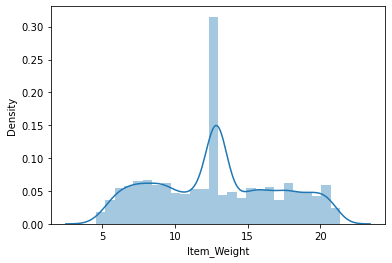

In [291]:
sns.distplot(df["Item_Weight"]) #pairnoume tis grafikes anaparastaseis

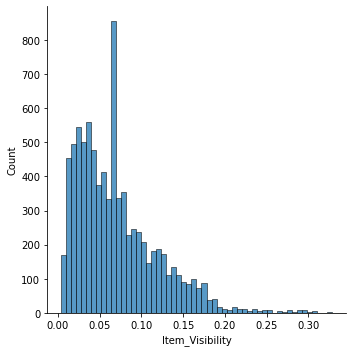

In [292]:
sns.displot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

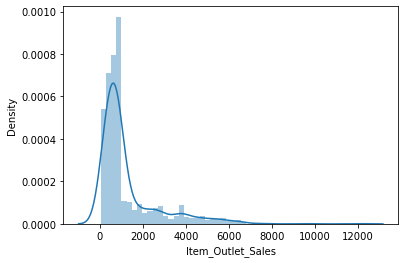

In [293]:
df['Item_Outlet_Sales']=pd.to_numeric(df['Item_Outlet_Sales'], errors='coerce') #metatrepoume thn sthlh apo string se float wste na thn anaparasthsoume grafika
sns.distplot(df['Item_Outlet_Sales'])

In [294]:
#to kanoume normalize, xrhsimopoiontas log transformation
df['Item_Outlet_Sales']=np.log(1+df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

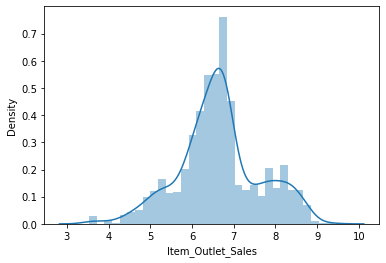

In [295]:
sns.distplot(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

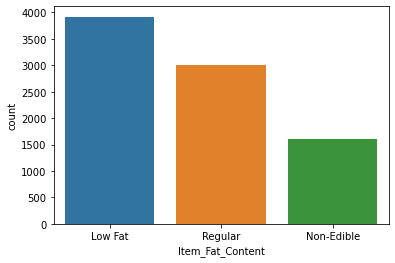

In [296]:
#categorical attributs
sns.countplot(df["Item_Fat_Content"])

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

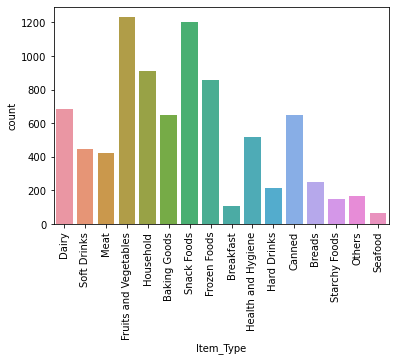

In [297]:
#plt.figure(figsize=(15,5))
l =list(df['Item_Type'].unique())


chart= sns.countplot(df["Item_Type"])  #import pyplot
chart.set_xticklabels(labels=l,rotation=90)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

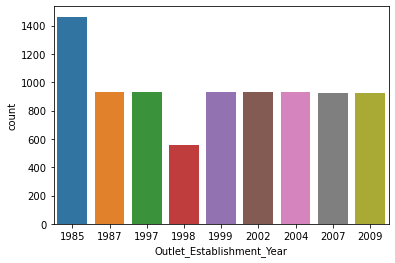

In [298]:
sns.countplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

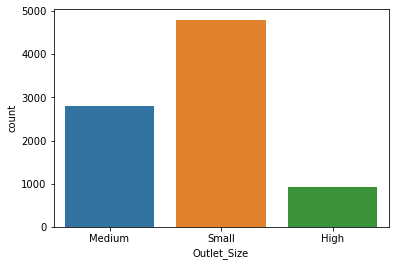

In [299]:
sns.countplot(df["Outlet_Size"])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

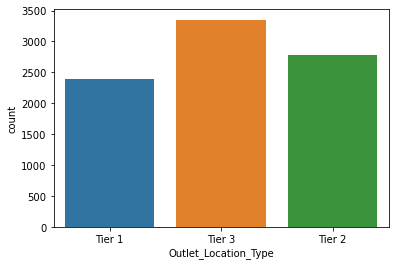

In [300]:
sns.countplot(df["Outlet_Location_Type"])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

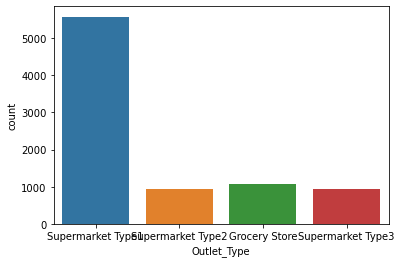

In [301]:
sns.countplot(df["Outlet_Type"]) #boroume na sundiasoume ta 3 teleutaia supermarkets

In [302]:
#                               Pinakas susxetisewn

<AxesSubplot:>

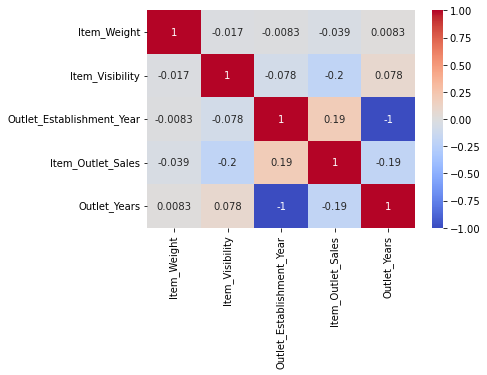

In [303]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [304]:
#Parathroume ta antikeimena me to megalutero antiktupo sth metavlhth mas (Item_Outlet_Sales)


In [305]:
#Label Encoding , gia na metatrepsoume se noumera times pou den einai machine friendly
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
category_col=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for col in category_col:
    df[col]= le.fit_transform(df[col])  # antika8ista ta atrribs pou eixame me noumera (px medium se ari8mo)

In [306]:
#Onehot Encoding --> dhmiourgei sthlh gia ka8e kathgoria kratontas metrhsh (px Outlet_Size_Medium -> 1 kai sta upoloipa 0)
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type'])
df.head()


,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,OUT049,1999,NaN,14,9,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,OUT018,2009,NaN,4,3,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,OUT049,1999,7.648868,14,9,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,OUT010,1998,6.597664,15,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,OUT013,1987,NaN,26,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1


In [307]:
#           Input (regression problem  (Palinndromhsh))1 eksartwmenh metavlhth Y, mia h perissoteres aneksarthtes X


X = df.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
Y= df['Item_Outlet_Sales']

In [308]:
#Model Training
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X,Y):
    #train
    model.fit(X,Y)
    #predict to training set
    pred = model.predict(X)

    #perform cross-validation
    cv_score = cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))  #gia to average value twn timwn
    print("Model Report")
    print("MSE:",mean_squared_error(Y,pred))
    print("CV Score:",cv_score)


In [309]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Visibility                 0
Item_Type                       0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Item_Outlet_Sales            7356
Outlet_Years                    0
Outlet                          0
Item_Fat_Content_0              0
Item_Fat_Content_1              0
Item_Fat_Content_2              0
Outlet_Size_0                   0
Outlet_Size_1                   0
Outlet_Size_2                   0
Outlet_Location_Type_0          0
Outlet_Location_Type_1          0
Outlet_Location_Type_2          0
Outlet_Type_0                   0
Outlet_Type_1                   0
Outlet_Type_2                   0
Outlet_Type_3                   0
New_Item_Type_0                 0
New_Item_Type_1                 0
New_Item_Type_2                 0
dtype: int64

In [310]:
df.replace([np.inf, -np.inf], np.nan, inplace=True) #gemizw nulls kai infinite ka8ws uphrxe error kata to train t montelou
df.fillna(df.mean(), inplace=True)

Model Report
MSE: 0.12050319072672475
CV Score: 0.12102432864526183


<AxesSubplot:title={'center':'Model Coefficients'}>

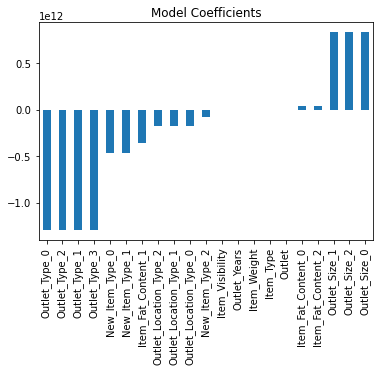

In [311]:
from sklearn.linear_model import LinearRegression, Ridge
model = LinearRegression(normalize=True)
train(model, X, Y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")    # sto sxediagramma parathroume to efficiency ka8e metavlhths sumfwna me to montelo mas

Model Report
MSE: 0.1219274069650887
CV Score: 0.12214218780327987


<AxesSubplot:title={'center':'Model Coefficients'}>

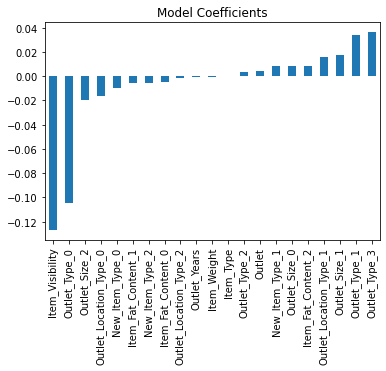

In [312]:
model = Ridge(normalize=True)
train(model, X, Y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

In [313]:
#kai ta duo montela einai arketa akrivh ka8ws ta score einai arketa konta me to Cross Validation scoree.